**Importing the dependencies**

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


**Data loading and Understanding**

In [2]:
dataset = pd.read_csv("C:/Users/user/OneDrive/Documents/Learn AI/ML_Projects/customer-churn-prediction/dataset/internet_service_churn.csv")

In [3]:
dataset.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


Column Name	                    Meaning
id	Customer                    ID number
is_tv_subscriber	            1 = has TV subscription, 0 = No
is_movie_package_subscriber	    1 = has movie package, 0 = No
subscription_age	            How long customer stayed (in years)
bill_avg	                    Average monthly bill amount
reamining_contract	            Remaining contract time (some missing values)
service_failure_count	        Number of service failures
download_avg	                Average download usage
upload_avg	                    Average upload usage
download_over_limit	            Times customer exceeded limit
churn	                        1 = Customer left, 0 = Customer stayed

In [4]:
dataset.shape

(72274, 11)

Remove Unnecessary Column

In [5]:
dataset.drop(columns=['id'] ,inplace=True)

In [6]:
dataset.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [7]:
dataset['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72274 non-null  int64  
 1   is_movie_package_subscriber  72274 non-null  int64  
 2   subscription_age             72274 non-null  float64
 3   bill_avg                     72274 non-null  int64  
 4   reamining_contract           50702 non-null  float64
 5   service_failure_count        72274 non-null  int64  
 6   download_avg                 71893 non-null  float64
 7   upload_avg                   71893 non-null  float64
 8   download_over_limit          72274 non-null  int64  
 9   churn                        72274 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


**Data Preprocessing**

*Handling mising Values*

In [9]:
dataset.isnull().sum()

is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [10]:
dataset['reamining_contract'].fillna(dataset['reamining_contract'].median(),inplace=True)
dataset['download_avg'].fillna(dataset['download_avg'].median(),inplace=True)
dataset['upload_avg'].fillna(dataset['upload_avg'].median(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10528\1599497957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['reamining_contract'].fillna(dataset['reamining_contract'].median(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10528\1599497957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [11]:
dataset.isnull().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

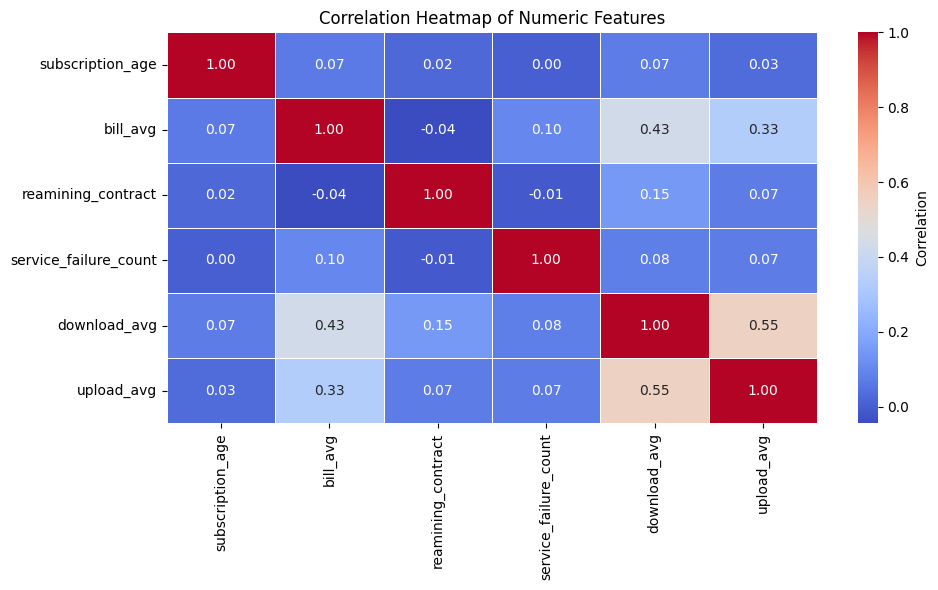

In [12]:
numeric_cols = ['subscription_age', 'bill_avg', 'reamining_contract',
                'service_failure_count', 'download_avg', 'upload_avg']

corr_matrix = dataset[numeric_cols].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [13]:
stay = dataset[dataset.churn == 0]
leave = dataset[dataset.churn == 1]

In [14]:
print(stay.shape)
print(leave.shape)

(32224, 10)
(40050, 10)


In [15]:
leave_sample = leave.sample(n=32224)


In [17]:
new_dataset = pd.concat([stay,leave_sample],axis = 0)

In [18]:
new_dataset.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
5,1,1,11.94,32,1.38,0,69.4,4.0,0,0
11,1,1,11.93,10,1.28,0,10.6,0.6,0,0
15,1,1,11.93,18,1.80,0,1.0,0.0,0,0
16,1,0,11.93,22,0.01,1,10.6,2.4,0,0


In [19]:
new_dataset['churn'].value_counts()

churn
0    32224
1    32224
Name: count, dtype: int64

In [22]:
x = new_dataset.drop(columns=['churn'])
y = new_dataset['churn']

In [23]:
print(x)

       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0                     1                            0             11.95   
5                     1                            1             11.94   
11                    1                            1             11.93   
15                    1                            1             11.93   
16                    1                            0             11.93   
...                 ...                          ...               ...   
69707                 1                            0              0.92   
29813                 1                            0              2.61   
16936                 1                            1              1.67   
26450                 1                            0              3.19   
14091                 1                            0              2.18   

       bill_avg  reamining_contract  service_failure_count  download_avg  \
0            25                0.14

In [24]:
print(y)

0        0
5        0
11       0
15       0
16       0
        ..
69707    1
29813    1
16936    1
26450    1
14091    1
Name: churn, Length: 64448, dtype: int64


*split data*

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

**Find Best Model**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def model_accuracy(model):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(" TRAIN METRICS ")
    print("Accuracy  :", train_accuracy)
    print("Precision :", train_precision)
    print("Recall    :", train_recall)
    print("F1 Score  :", train_f1)

    print("\n TEST METRICS ")
    print("Accuracy  :", test_accuracy)
    print("Precision :", test_precision)
    print("Recall    :", test_recall)
    print("F1 Score  :", test_f1)

    cv_f1 = cross_val_score(
        model,
        X_train,
        y_train,          
        cv=5,
        scoring='f1'                
    )

    print("\n===== CROSS VALIDATION =====")
    print("CV F1 Scores :", cv_f1)
    print("Mean CV F1   :", cv_f1.mean())

In [29]:
model = LogisticRegression()
model_accuracy(model)

 TRAIN METRICS (on resampled data) 
Accuracy  : 0.8307343186314442
Precision : 0.8313711947408177
Recall    : 0.8307343186314442
F1 Score  : 0.830640847372174

 TEST METRICS (on original test set) 
Accuracy  : 0.8315748642358417
Precision : 0.8323899126892099
Recall    : 0.8315748642358417
F1 Score  : 0.8315223331656936

===== CROSS VALIDATION (on resampled data) =====
CV F1 Scores : [0.83930767 0.82974485 0.83624952 0.83806658 0.83032423]
Mean CV F1   : 0.8347385711123501


In [30]:
model = KNeighborsClassifier()
model_accuracy(model)

 TRAIN METRICS (on resampled data) 
Accuracy  : 0.9199542263082354
Precision : 0.9200922221725265
Recall    : 0.9199542263082354
F1 Score  : 0.9199496589950757

 TEST METRICS (on original test set) 
Accuracy  : 0.8892164468580295
Precision : 0.8892735515369926
Recall    : 0.8892164468580295
F1 Score  : 0.8892035346255576

===== CROSS VALIDATION (on resampled data) =====
CV F1 Scores : [0.89632173 0.89021643 0.88802185 0.89292338 0.88815018]
Mean CV F1   : 0.8911267124469229


In [31]:
model = DecisionTreeClassifier()
model_accuracy(model)

 TRAIN METRICS (on resampled data) 
Accuracy  : 0.9999806043678964
Precision : 0.9999806051221793
Recall    : 0.9999806043678964
F1 Score  : 0.9999806043688522

 TEST METRICS (on original test set) 
Accuracy  : 0.9117920868890613
Precision : 0.9118125130394795
Recall    : 0.9117920868890613
F1 Score  : 0.9117868804741102

===== CROSS VALIDATION (on resampled data) =====
CV F1 Scores : [0.91271917 0.91388299 0.91329592 0.91323586 0.91039427]
Mean CV F1   : 0.9127056402698601


In [32]:
model = SVC(kernel='linear', random_state=42)   # fixed: kernel='linear'
model_accuracy(model)

 TRAIN METRICS (on resampled data) 
Accuracy  : 0.8318398696613523
Precision : 0.8331908901368964
Recall    : 0.8318398696613523
F1 Score  : 0.8316518980511638

 TEST METRICS (on original test set) 
Accuracy  : 0.8318076027928627
Precision : 0.8332916866761039
Recall    : 0.8318076027928627
F1 Score  : 0.8316893645715856

===== CROSS VALIDATION (on resampled data) =====
CV F1 Scores : [0.84275552 0.83574244 0.83917798 0.83832447 0.83003656]
Mean CV F1   : 0.837207395447267


In [33]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model_accuracy(model)

 TRAIN METRICS (on resampled data) 
Accuracy  : 0.9999806043678964
Precision : 0.999980605118327
Recall    : 0.9999806043678964
F1 Score  : 0.999980604366926

 TEST METRICS (on original test set) 
Accuracy  : 0.9360744763382467
Precision : 0.9361540363251158
Recall    : 0.9360744763382467
F1 Score  : 0.9360665452007867

===== CROSS VALIDATION (on resampled data) =====
CV F1 Scores : [0.94234164 0.94118796 0.93984375 0.93983423 0.93859992]
Mean CV F1   : 0.9403614997305727


*Best Model is RandomForestClassifier*

In [36]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [47]:
import numpy as np

input_data = (1,0,0.35,47,0,0,77.7,29.8,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

input_data_scaled = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_scaled)

print("Prediction:", prediction)

if prediction[0] == 0:
    print("Customer stayed")
else:
    print("Customer left")

Prediction: [1]
Customer left


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
